In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def convert_2_indicator(Yin) :
    N = len(Yin)
    K = np.max(Yin) + 1
    Yout = np.zeros((N, K))
    for n in range(N) :
        Yout[n, Yin[n]] = 1
    return Yout

def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

def softmax(a) :  #shape of a = N X M
    aExp = np.exp(a)
    return aExp / aExp.sum(axis =1, keepdims= True)

def forward(X, W1, b1, W2, b2) :
    alpha = (X.dot(W1) + b1)
    z = sigmoid(alpha) #shape of z = N X M, W2 = M X K
    a = z.dot(W2) + b2  #shape of a = N X M
    y = softmax(a)
    return y, z

def derivate_w2(Z, T, Y) :
    N, K = T.shape
    M = Z.shape[1]
    return Z.T.dot(T - Y)

def derivate_b2(T, Y) :
    return np.sum(T - Y, axis = 0)

def derivate_w1(X, Z, T, Y, W2):
    return X.T.dot((T - Y).dot(W2.T)* Z * (1 - Z))

def derivate_b1(T, Y, W2, Z) :
    return np.sum((T - Y).dot(W2.T) * Z * (1 - Z), axis = 0)

def cost(T, Y) :
    return  (T * np.log(Y)).sum()  #element wise multiplication

def classification_rate(T, Y) :
    T_labels = np.argmax(T, axis = 1)
    Y_labels = np.argmax(Y, axis = 1)
    return (T_labels == Y_labels).mean()

In [70]:
def main() :

    N_each_class = 500
    D = 2
    M = 3 #no  of hidden nodes
    K = 3 #no of classes
    N = N_each_class * K

    X = np.random.randn(N, D)
    X[:N_each_class] += np.array([0, -2])
    X[N_each_class:N_each_class*2] += np.array([2, 2])
    X[N_each_class*2:N_each_class*3] += np.array([2, -2])

    T = np.array([0] * N_each_class + [1] * N_each_class + [2] * N_each_class)
    T= convert_2_indicator(T)

    plt.scatter(X[:,0], X[:, 1], c = T, s = 10)
    plt.show()
    
    #randomly initalizing the weights
    W1 = np.random.randn(D, M) / np.sqrt(M * D)
    b1 = np.random.randn(M) / np.sqrt(M)
    W2 = np.random.randn(M, K) / np.sqrt(M * K)
    b2 = np.random.rand(K) / np.sqrt(K)
    
    costs = []
    learning_rate = 10e-7
    epochs = 200000
    
    
    for epoch in range(epochs) :
        Y, Z = forward(X, W1, b1, W2, b2)
        if epoch % 500 == 0:
            c = cost(T, Y)
            costs.append(c)
            print(c)
            
        W2 += learning_rate * derivate_w2(Z, T, Y)
        b2 += learning_rate * derivate_b2(T, Y)
        W1 += learning_rate * derivate_w1(X, Z, T, Y, W2)
        b1 += learning_rate * derivate_b1(T, Y, W2, Z)

    plt.figure()
    plt.plot(costs)
    plt.show()
    
    print('Final classification rate : ', classification_rate(T, Y))

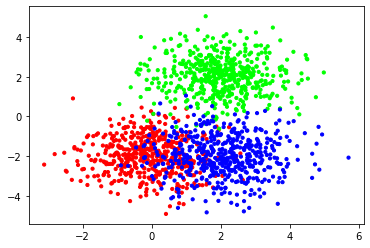

-1808.2026313311967
-1670.1679128454716
-1580.3516720972389
-1512.6333521290549
-1453.892963381416
-1398.6705671183302
-1345.4657955476157
-1294.4980746102256
-1246.486183717443
-1202.068336837934
-1161.600032404625
-1125.1478621754986
-1092.5611975315037
-1063.5565932531167
-1037.7871476610785
-1014.8902295436874
-994.5162350241667
-976.3435993806443
-960.0849319187564
-945.4879177391158
-932.3334185662479
-920.4322756188202
-909.621685247232
-899.7616179193898
-890.7315108657642
-882.4273269664924
-874.7589974663201
-867.6482281034555
-861.0266313267391
-854.8341419232274
-849.0176740265533
-843.5299809675143
-838.3286840269616
-833.3754409504827
-828.6352296530566
-824.0757267167011
-819.6667640514481
-815.3798505176178
-811.1877485059674
-807.0640985708333
-802.9830883382124
-798.9191651732355
-794.8467955514659
-790.7402777227621
-786.5736179682767
-782.3204842921754
-777.954254405548
-773.4481769184166
-768.775665309679
-763.9107430906402
-758.8286552555052
-753.5066551920488
-74

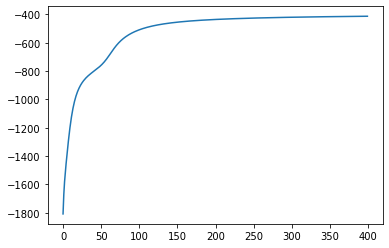

Final classification rate :  0.8866666666666667


In [71]:
if __name__ == "__main__" :
    main()

In [63]:
np.array([[2, 3], [4, 3]]).argmax(axis = 1)

array([1, 0], dtype=int64)